In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import numpy as np
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd

# For time series analysis, we also need another module
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_file_name = 'C:\Users\sijop\Documents\Acads\Data Analytics Programming\Global Terrorism Database\globalterrorismdb_0718dist.csv'
gtd = pd.read_csv(data_file_name)

C:\Users\sijop\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
total_attacks_by_gname = gtd.groupby(['gname']).size()
#total_attacks_by_gname

Text(0,0.5,'Number of attacks')

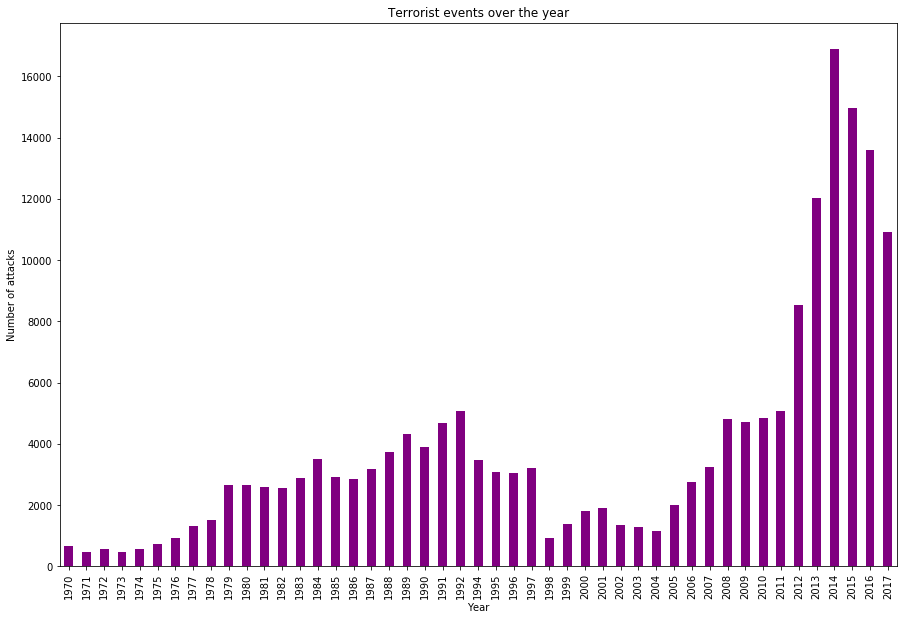

In [5]:
ax = gtd.groupby(['iyear']).size().plot(kind='bar',style='--', color='purple',title='Terrorist events over the year', figsize=(15,10))
ax.set_xlabel("Year")
ax.set_ylabel('Number of attacks')

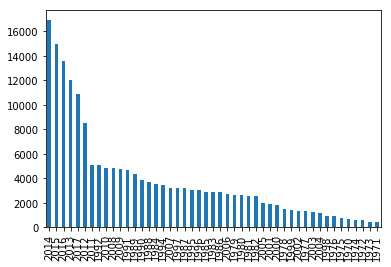

In [6]:
gtd['iyear'].value_counts().plot(kind='bar')

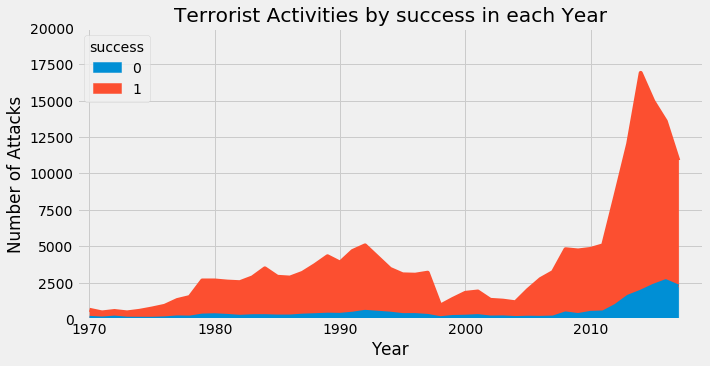

In [9]:
pd.crosstab(gtd.iyear, gtd.success).plot(kind='area',figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.title('Terrorist Activities by success in each Year')
plt.xlabel('Year')
plt.axis([1969, 2019, 0,20000 ])
plt.ylabel('Number of Attacks')
plt.show()

KeyError: "['score'] not in index"

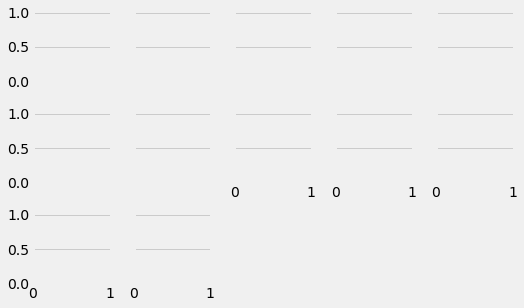

In [10]:
g = sns.FacetGrid(gtd, col="weaptype1_txt", col_wrap=5, height=1.5)
g = g.map(plt.plot, "iyear", "score", marker=".")

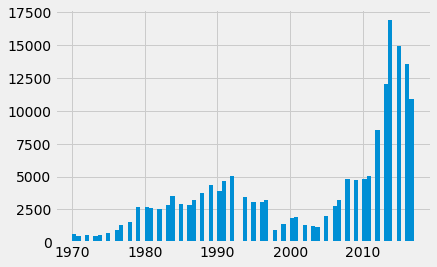

In [11]:
gtd['iyear'].hist(bins= 80)

### Weapon type : Change in usage

Text(0,0.5,'Number of attacks')

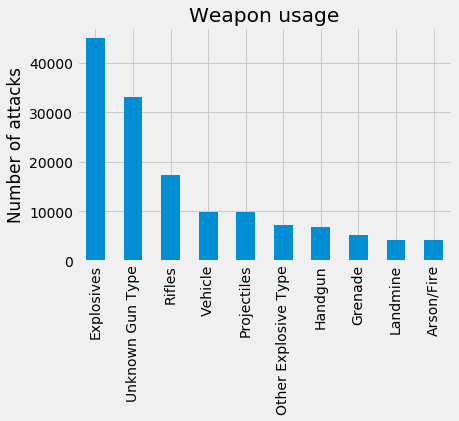

In [12]:
ax=gtd.weapsubtype1_txt.value_counts().sort_values(ascending = False)[:10].plot(kind='bar', title = 'Weapon usage')
labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[7] = 'Vehicle'
labels[0] = 'Explosives'
labels[2] = 'Rifles'
labels[4] = 'Projectiles'
ax.yaxis_inverted()
ax.set_xticklabels(labels)
#ax.set_xlabel("Weapon type")
ax.set_ylabel('Number of attacks')

In [13]:
top_5_10_weapons=gtd['weapsubtype1_txt'].value_counts()[5:10].index

In [14]:
top_5_weapons=gtd['weapsubtype1_txt'].value_counts()[:5].index

In [15]:
weapons_over=pd.crosstab(gtd.iyear, gtd.weapsubtype1_txt[gtd.weapsubtype1_txt.isin(top_5_weapons)])
weapons_over.head()

weapsubtype1_txt,Automatic or Semi-Automatic Rifle,"Projectile (rockets, mortars, RPGs, etc.)",Unknown Explosive Type,Unknown Gun Type,Vehicle
iyear,,,,,
1970,28,2,164,20,9
1971,19,3,196,40,1
1972,15,4,122,167,28
1973,33,4,120,110,14
1974,34,2,258,103,15


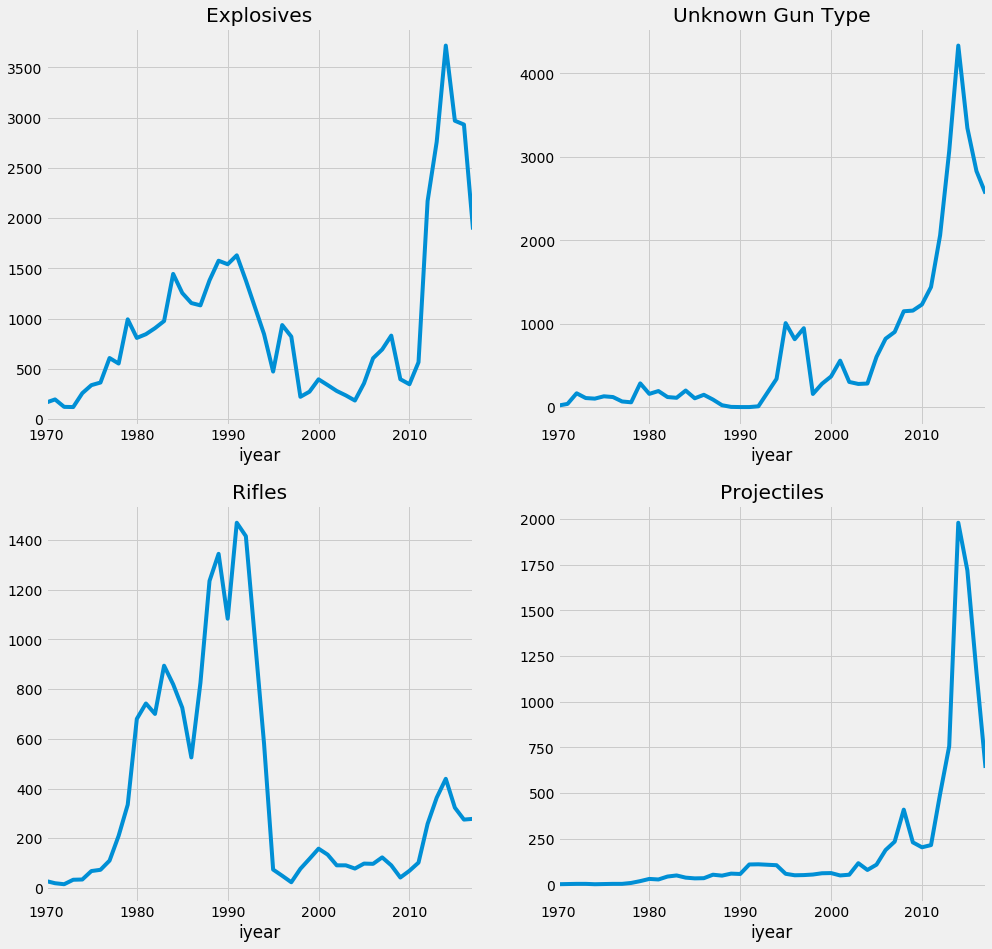

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
weapons_over['Unknown Explosive Type'].plot('line', title = 'Explosives')

plt.subplot(2,2,2)
weapons_over['Unknown Gun Type'].plot('line', title = 'Unknown Gun Type')


plt.subplot(2,2,3)
weapons_over['Automatic or Semi-Automatic Rifle'].plot('line', title='Rifles')

plt.subplot(2,2,4)
weapons_over['Projectile (rockets, mortars, RPGs, etc.)'].plot('line', title = 'Projectiles')
#plt.subplot(2,3,5)
#weapons_over['Vehicle'].plot('line', title = 'Vehicle')




<Figure size 1080x1080 with 0 Axes>

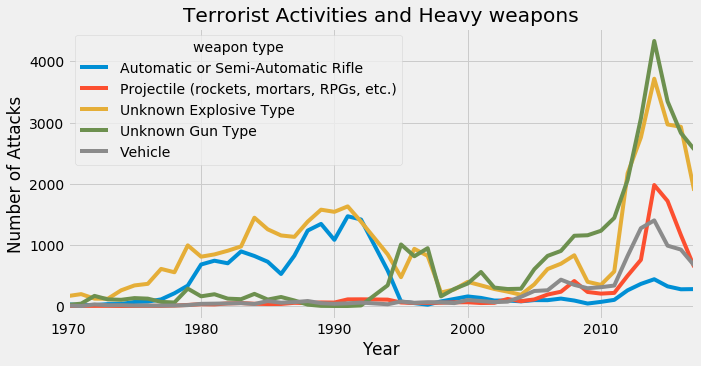

In [17]:
plt.figure(figsize=(15,15))
pd.crosstab(gtd.iyear, gtd.weapsubtype1_txt[gtd.weapsubtype1_txt.isin(top_5_weapons)]).plot(kind='line',figsize=(10,5))
plt.title('Terrorist Activities and Heavy weapons')
plt.ylabel('Number of Attacks')
plt.xlabel('Year')
plt.legend(title="weapon type")
plt.show()



In [18]:
weapons_top_5_10 =pd.crosstab(gtd.iyear, gtd.weapsubtype1_txt[gtd.weapsubtype1_txt.isin(top_5_10_weapons)])
weapons_top_5_10.head()

weapsubtype1_txt,Arson/Fire,Grenade,Handgun,Landmine,Other Explosive Type
iyear,,,,,
1970,26,2,20,0,15
1971,8,0,18,2,5
1972,2,3,14,8,5
1973,3,2,35,6,1
1974,1,2,32,3,4


Text(0.5,0,'Year')

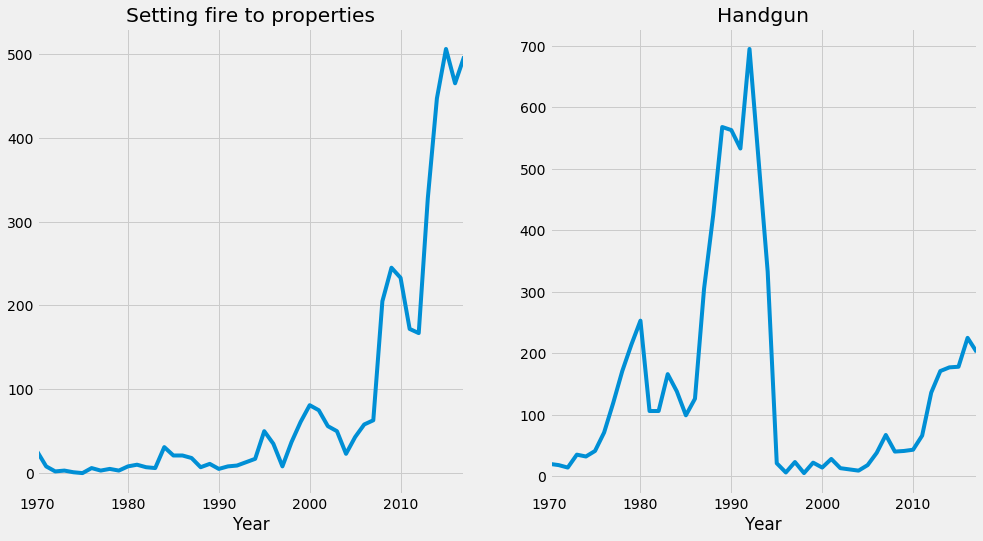

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax=weapons_top_5_10['Arson/Fire'].plot('line', title = 'Setting fire to properties')
ax.set_xlabel("Year")
plt.subplot(1,2,2)
ax=weapons_top_5_10['Handgun'].plot('line', title = 'Handgun')
ax.set_xlabel('Year')

#plt.subplot(2,2,3)
#weapons_over['Automatic or Semi-Automatic Rifle'].plot('line', title='Rifles')

#plt.subplot(2,2,4)
#weapons_over['Projectile (rockets, mortars, RPGs, etc.)'].plot('line', title = 'Projectiles')
#plt.subplot(2,3,5)
#weapons_over['Vehicle'].plot('line', title = 'Vehicle')




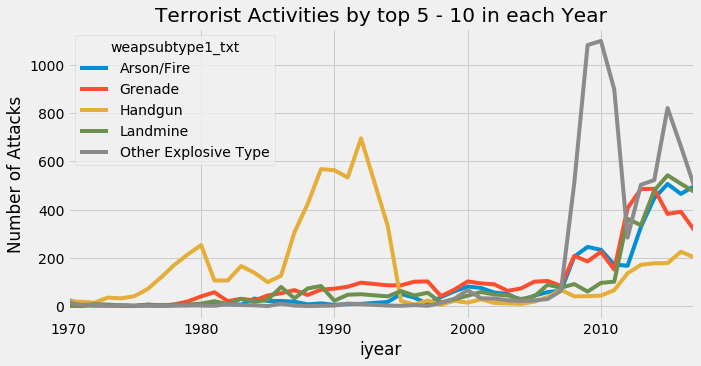

In [218]:
pd.crosstab(gtd.iyear, gtd.weapsubtype1_txt[gtd.weapsubtype1_txt.isin(top_5_10_weapons)]).plot(kind='line',figsize=(10,5))
plt.title('Terrorist Activities by top 5 - 10 in each Year')
plt.ylabel('Number of Attacks')
plt.show()

- Use of arson/Fire going up 
- Handgun usage going up 

- The use of easier to access destruction methods are rising. 


In [101]:
(pd.crosstab(gtd.weapsubtype1_txt, gtd.target1) > 10).sum().sort_values(ascending= False)[:10]

target1
Unknown           18
Vehicle           17
Civilians         17
Officers          16
Bus               15
Patrol            14
Soldiers          13
Police Station    12
Checkpoint        11
Mosque            11
dtype: int64

Text(0,0.5,'Targets')

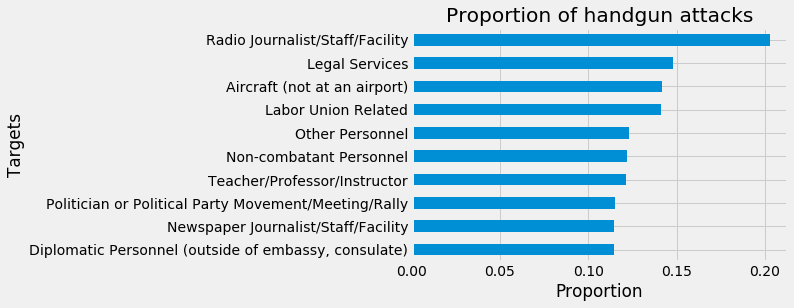

In [33]:
total_target_count = gtd.groupby(['targsubtype1_txt']).size()
handgun= gtd[gtd['weapsubtype1_txt'] == 'Handgun']
ax=(handgun.targsubtype1_txt.value_counts()/total_target_count).sort_values(ascending = False)[:10].plot(kind='barh')
ax.invert_yaxis() 
ax.set_title('Proportion of handgun attacks')
ax.set_xlabel('Proportion')
ax.set_ylabel('Targets')


In [443]:
(handgun.targsubtype1_txt.value_counts())#/total_target_count).sort_values(ascending = False)[:10]

Police Security Forces/Officers                                            1100
Politician or Political Party Movement/Meeting/Rally                        726
Government Personnel (excluding police, military)                           524
Unnamed Civilian/Unspecified                                                365
Military Personnel (soldiers, troops, officers, forces)                     350
Named Civilian                                                              245
Laborer (General)/Occupation Identified                                     191
Newspaper Journalist/Staff/Facility                                         170
Radio Journalist/Staff/Facility                                             143
Party Official/Candidate/Other Personnel                                    137
Religion Identified                                                         126
Bank/Commerce                                                               117
Labor Union Related                     

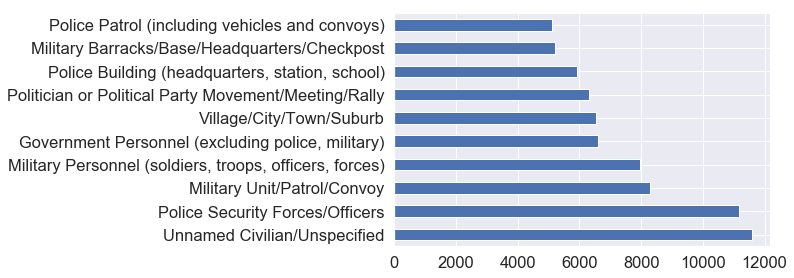

In [274]:
(gtd.targsubtype1_txt.value_counts()[:10]).plot(kind='barh')#/total_target_count)

In [434]:
gtd['is_handgun'] = np.where(gtd['weapsubtype1_txt'] == 'Handgun',1,0)

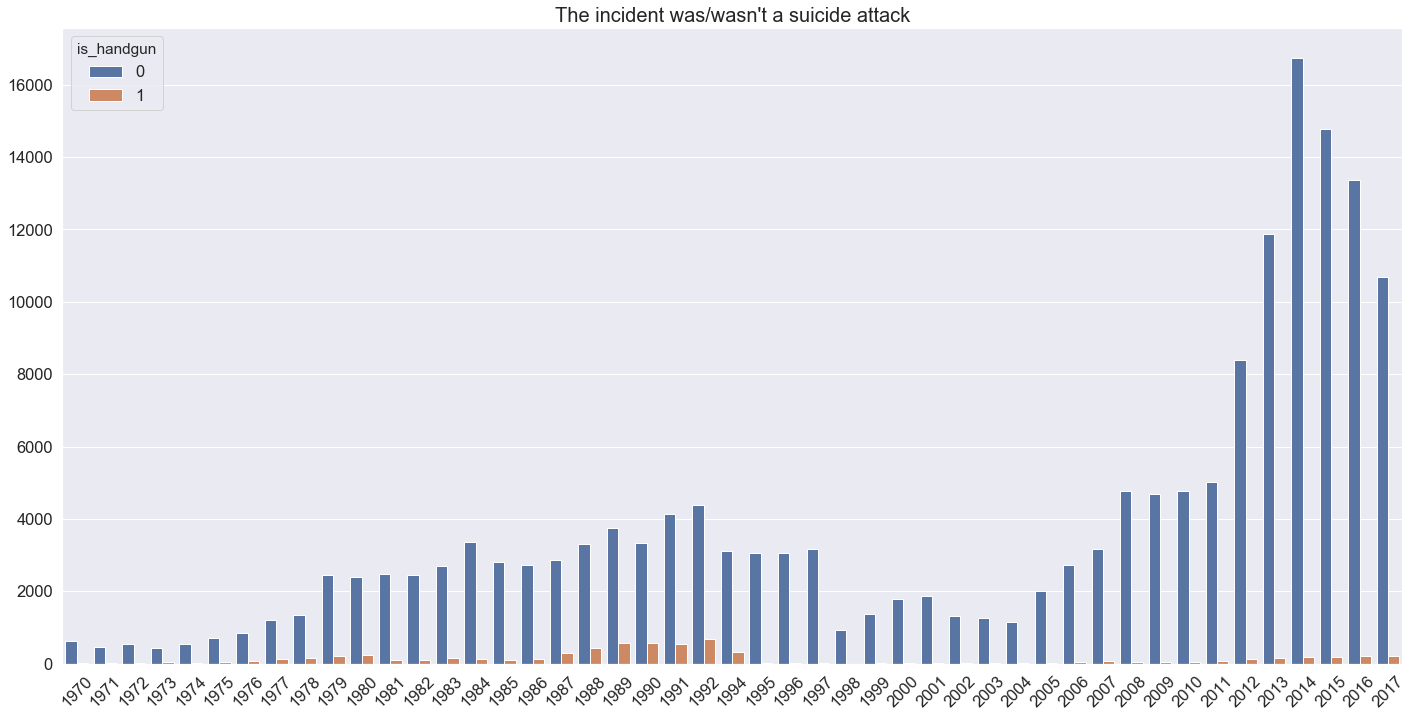

In [438]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=gtd,hue='is_handgun');
plt.title("The incident was/wasn't a suicide attack", fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.xticks(rotation=45);

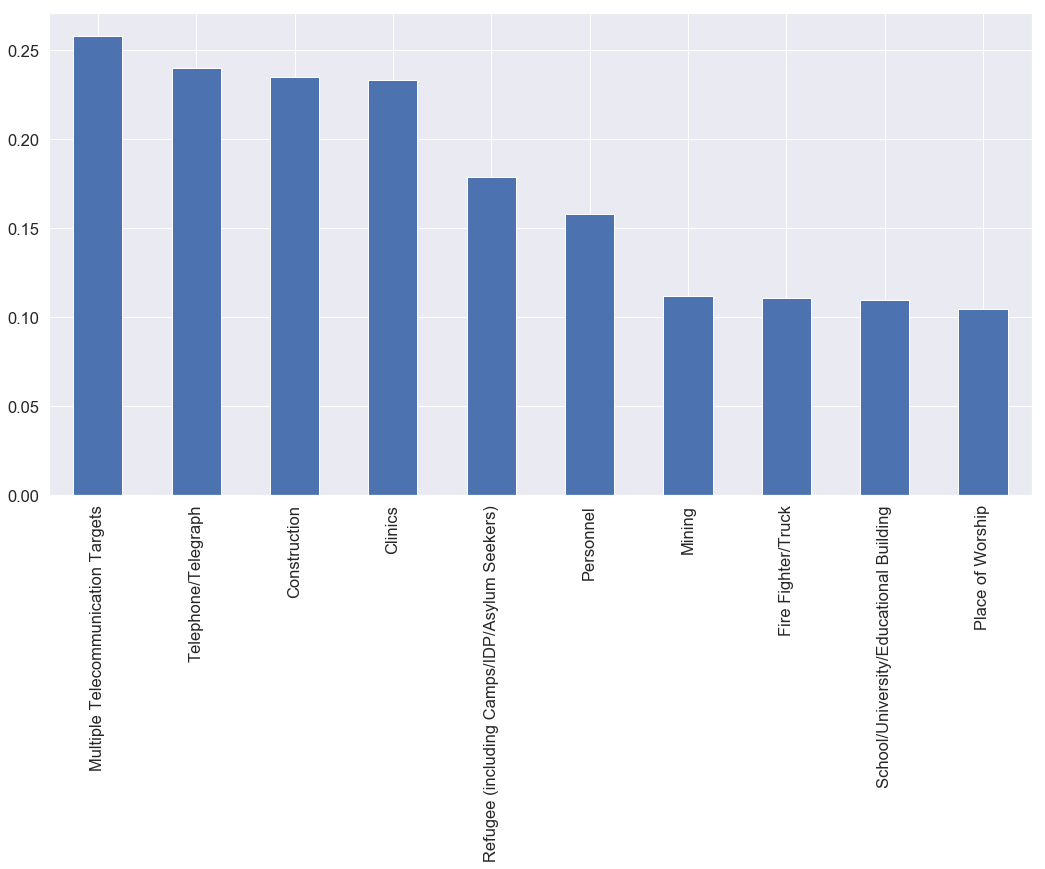

In [439]:
arson_fire= gtd[gtd['weapsubtype1_txt'] == 'Arson/Fire']
(arson_fire.targsubtype1_txt.value_counts()/total_target_count).sort_values(ascending = False)[:10].plot(kind='bar')

### Lethality

In [12]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [13]:
gtd.nkill.quantile(q=0.95)

10.0

In [14]:
top_events = gtd[gtd.nkill > 10]
top_events.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
80,197002210002,1970,2,21,NaN,0,NaN,199,Switzerland,8,Western Europe,Zurich,Zurich,47.368650,8.539182,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Swiss Air DC-9,199.0,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Popular Front for the Liberation of Palestine,...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,47.0,NaN,NaN,0.0,NaN,NaN,1,2.0,Major (likely >= $1 million but < $1 billion),3000000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,0,1,NaN
210,197004210001,1970,4,21,NaN,0,NaN,160,Philippines,5,Southeast Asia,Unknown,Cauayan,NaN,NaN,5.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Philippines Airlines Aircraft,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,36.0,NaN,NaN,0.0,NaN,NaN,1,2.0,Major (likely >= $1 million but < $1 billion),2000000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
1085,197111200002,1971,11,20,NaN,0,NaN,201,Taiwan,4,East Asia,Penghu,Unknown,23.583333,119.583330,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,China Airlines Caravelle en route Taipei to Ho...,44.0,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,25.0,NaN,NaN,NaN,NaN,NaN,1,2.0,Major (likely >= $1 million but < $1 billion),1000000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
1099,197112040001,1971,12,4,NaN,0,NaN,603,United Kingdom,8,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,2.0,Restaurant/Bar/Caf�,McGurk's Bar,15 Catholics,233.0,Northern Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ulster Volunteer For

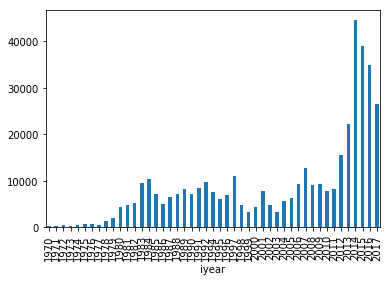

In [15]:
gtd.groupby(['iyear'])['nkill'].agg('sum').plot(kind='bar')

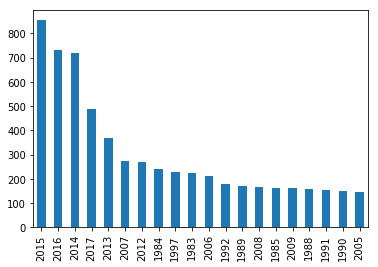

In [16]:
#Number of events with more than 50 kills!!!! 
top_events['iyear'].value_counts()[:20].plot(kind='bar')

In [17]:
total_events_per_year =gtd['iyear'].value_counts()
total_top_events_per_year =top_events['iyear'].value_counts()

In [18]:
proportion_top_events = total_top_events_per_year/total_events_per_year

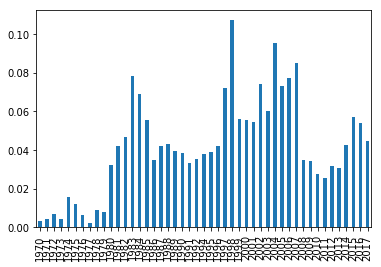

In [19]:
proportion_top_events.plot(kind='bar')

In [20]:
test5 = pd.crosstab(index=top_events['iyear'], columns=top_events['success'])

#test5.plot(kind='bar', stacked=True)

In [21]:
#.groupby(['weapsubtype1_txt', 'iyear'])['success'].mean().unstack().plot.bar()

In [22]:
small_events = gtd[gtd.nkill < 10]
small_events.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black Nationalists,NaN,NaN,NaN,NaN,NaN,To protest the Cairo Illinois Police Deparment,0.0,NaN,NaN,0,-99.0,-99.0,0.0,NaN,NaN

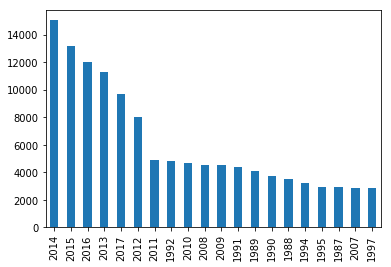

In [23]:
#Number of events with more than 50 kills!!!! 
small_events['iyear'].value_counts()[:20].plot(kind='bar')

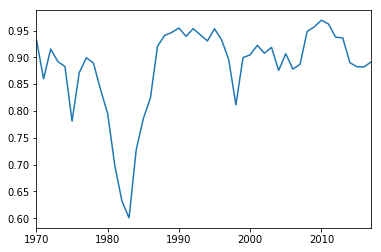

In [24]:
total_small_events_per_year =small_events['iyear'].value_counts()
proportion_small_events = total_small_events_per_year/total_events_per_year
proportion_small_events.plot(kind='line')


## LETHALITY

In [25]:
gtd['is_kill'] = np.where(gtd.nkill >0,1,0)

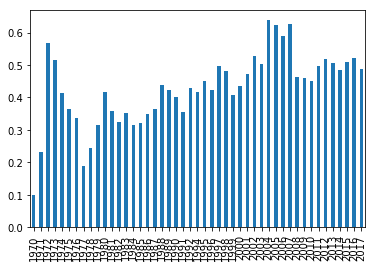

In [26]:
(gtd.groupby('iyear')['is_kill'].agg('sum') / total_events_per_year).plot(kind='bar')

### Suicide

In [577]:
df_suicide= gtd.groupby(['weapsubtype1_txt'])['nkill','nwound'].agg(['mean'])

In [578]:
df_suicide

,nkill,nwound
,mean,mean
weapsubtype1_txt,,
Arson/Fire,0.889858,0.649378
Automatic or Semi-Automatic Rifle,4.987877,2.038059
Blunt Object,0.466667,2.082267
Dynamite/TNT,0.742424,2.643052
Explosive,2.161290,41.666667
Gasoline or Alcohol,0.368421,0.785714
Grenade,1.146101,4.535843
Handgun,1.163271,0.573107


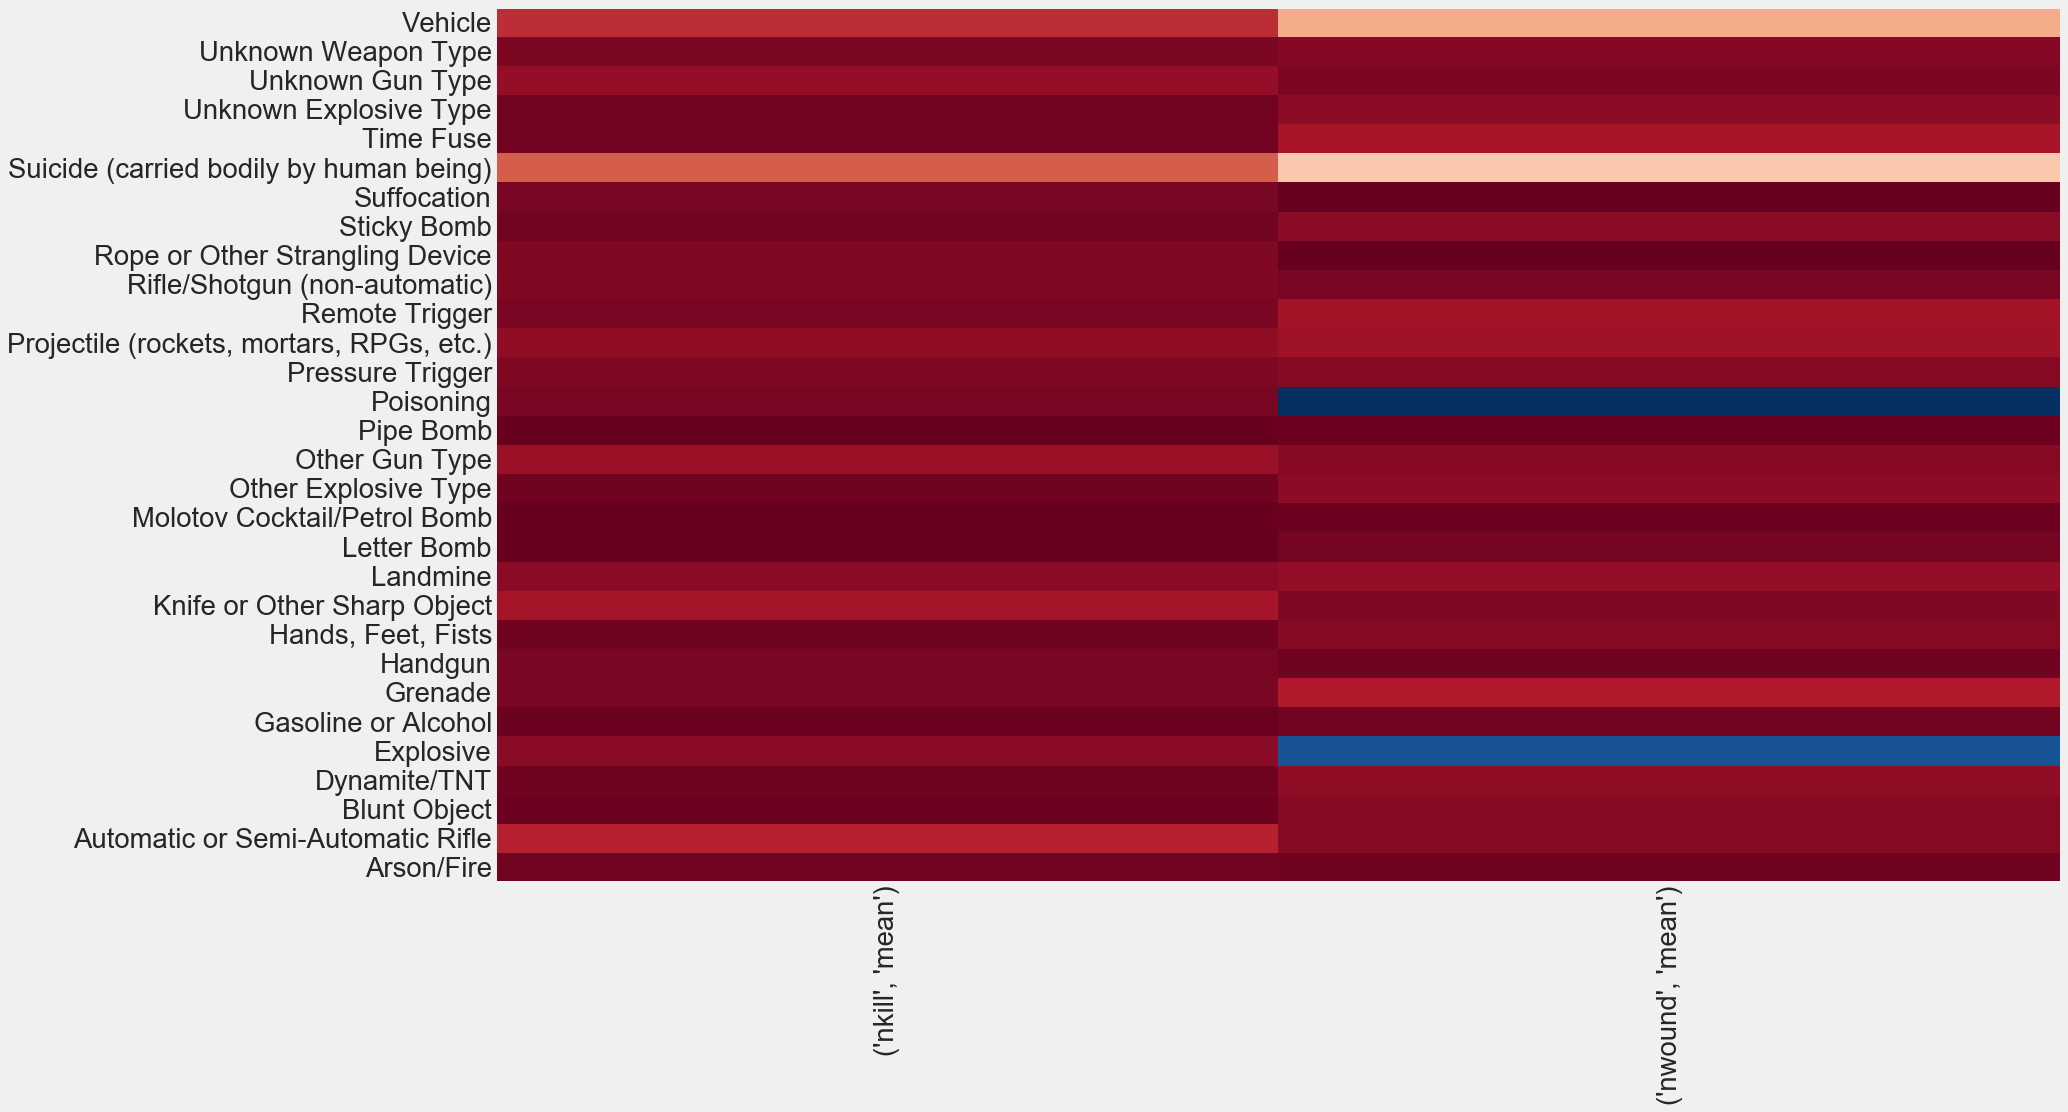

In [579]:
plt.figure(figsize=(25,15))
plt.pcolor(df_suicide,cmap='RdBu')
plt.yticks(np.arange(0.5, len(df_suicide.index), 1), df_suicide.index)
plt.xticks(np.arange(0.5, len(df_suicide.columns), 1), df_suicide.columns,rotation=90)

plt.show()

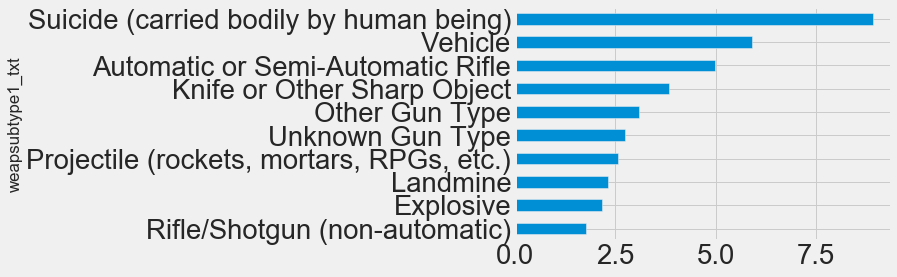

In [583]:

df_suicide_visual= gtd.groupby(['weapsubtype1_txt'])['nkill'].agg('mean').sort_values(ascending=False)
df_suicide_visual.sort_values(ascending = False)[:10].plot(kind='barh').invert_yaxis() 

In [528]:
df_suicide_visual['weapsubtype1_txt'] = df_suicide_visual.index

In [530]:
df_suicide_visual.columns = ['weapsubtype1_txt', 'nkills']

In [544]:
df_suicide_visual.head()

weapsubtype1_txt
Suicide (carried bodily by human being)    8.90618
Vehicle                                    5.90613
Automatic or Semi-Automatic Rifle          4.98788
Knife or Other Sharp Object                3.84555
Other Gun Type                             3.09412
Name: nkill, dtype: object

In [542]:
df_suicide_visual.head()
x = df_suicide_visual.loc[:, ['nkills']]
#mean_x = x.mean()
df_suicide_visual['nkill_z'] = (x - x.mean()) /x.std()

df_suicide_visual['colors'] = ['red' if x < 0 else 'green' for x in df_suicide_visual['nkill_z']]
df_suicide_visual.sort_values('nkill_z', inplace=True)
#df_suicide_visual.reset_index(inplace=True)
df_suicide_visual.head()


# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df_suicide_visual.index, xmin=0, xmax=df_suicide_visual.nkill_z, color=df_suicide_visual.colors, 
           alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Attack Type$', xlabel='Z- score of number of kills')
plt.yticks(df_suicide_visual.index, df_suicide_visual.weapsubtype1_txt, fontsize=12)
plt.title('Number of killings', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.style.use('fivethirtyeight')
plt.show()

IndexingError: Too many indexers

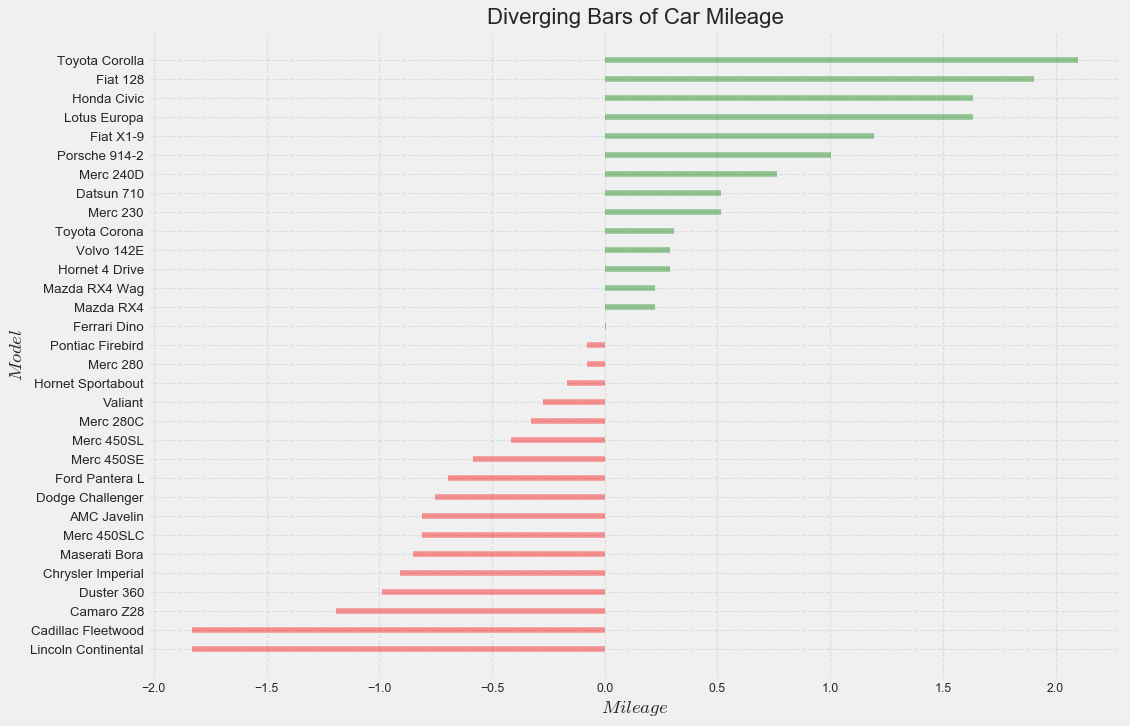

In [339]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
df.head()
# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

C:\Users\sijop\Anaconda2\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1800x720 with 0 Axes>

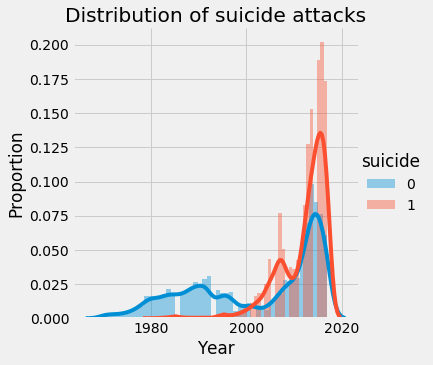

In [29]:
#sns.set(rc={'figure.figsize':(15.7,8.27)})
plt.figure(figsize=(25,10))
sns.FacetGrid(gtd, hue="suicide", size=5) \
   .map(sns.distplot, "iyear") \
   .add_legend();
plt.title("Distribution of suicide attacks")
plt.xlabel("Year")
plt.ylabel("Proportion")

plt.show();

In [28]:
suicide_attacks = gtd[gtd.suicide == 1]

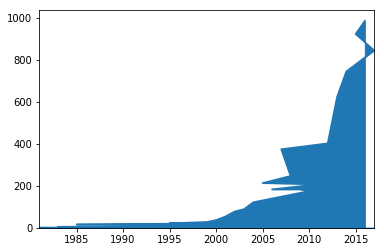

In [29]:
suicide_attacks['iyear'].value_counts().plot(kind='area')

In [349]:
#(suicide_attacks.groupby(['gname'])['success'].agg('sum').value_counts()[:10]
# /total_attacks_by_gname).plot(kind='bar')#.plot(kind='bar') #.value_counts().plot(kind='area')
total_attacks_atleast_10 = total_attacks_by_gname[total_attacks_by_gname >= 10]

[Text(0,0,'0.00%'),
 Text(0,0,'10.00%'),
 Text(0,0,'20.00%'),
 Text(0,0,'30.00%'),
 Text(0,0,'40.00%'),
 Text(0,0,'50.00%'),
 Text(0,0,'60.00%'),
 Text(0,0,'70.00%')]

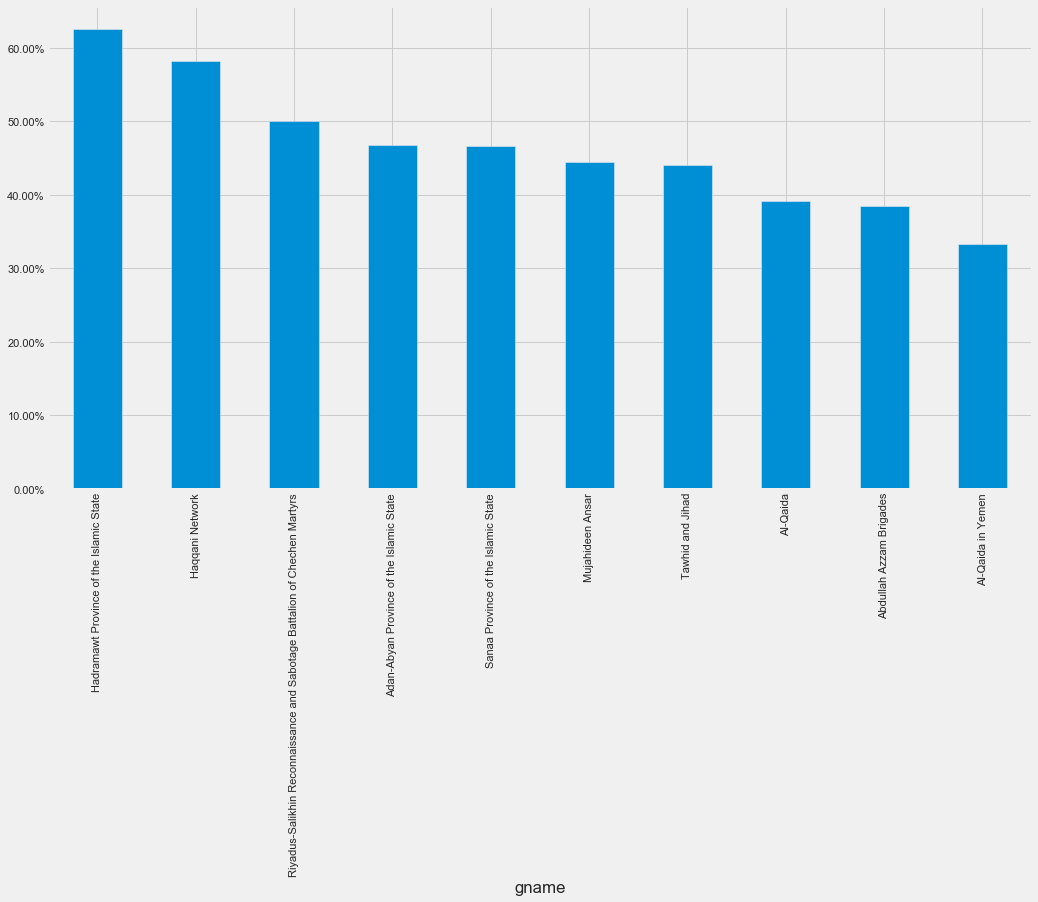

In [355]:
ax=(suicide_attacks.groupby(['gname']).size() / total_attacks_atleast_10).sort_values(ascending =False)[:10].plot(kind='bar', stacked=True)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [351]:
plt.bar(gtd[''], men_means, width, label='Men')
plt.bar(ind + width, women_means, width,
    label='Women')

plt.ylabel('Scores')
plt.title('Scores by group and gender')

plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(loc='best')
plt.show()


NameError: name 'r' is not defined

In [ ]:
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()


In [49]:
total_attacks_by_gname['Hadramawt Province of the Islamic State']

16

In [64]:
#pd.crosstab(suicide_attacks['suicide'], suicide_attacks['nkill']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')

In [67]:
#suicide_attacks['nkill'].hist(bins=100)

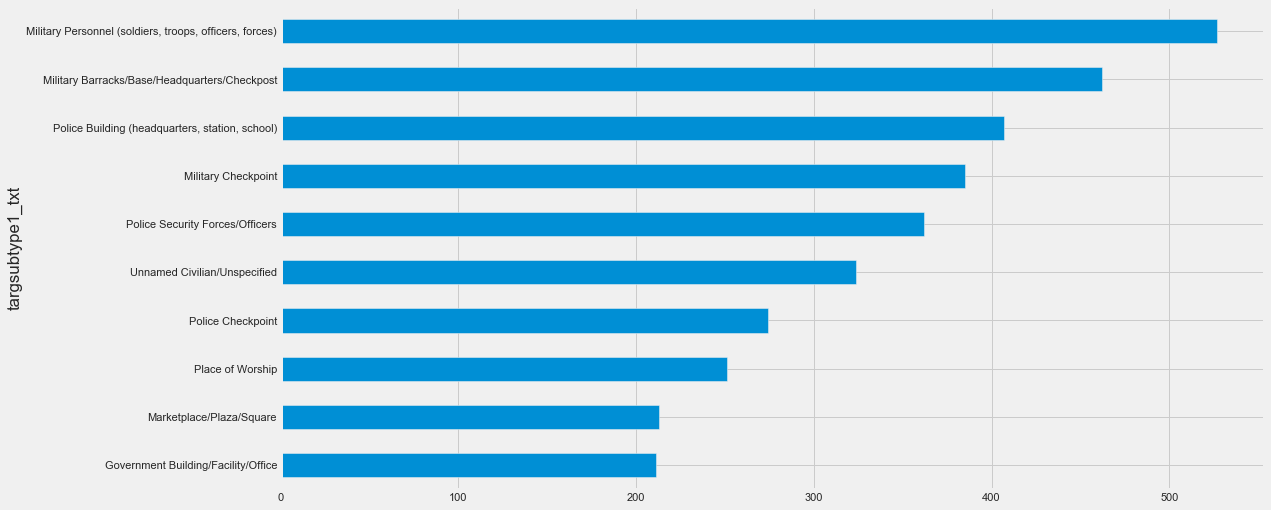

In [359]:
suicide_attacks.groupby(['targsubtype1_txt']).size().sort_values(ascending= False)[:10].plot(kind='barh', rot=0).invert_yaxis()
#ax.
#gtd.targsubtype1_txt

In [72]:
suicide_attacks.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,is_kill
15030,198112150003,1981,12,15,NaN,0,NaN,110,Lebanon,10,Middle East & North Africa,Beirut,Beirut,33.888523,35.503513,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,1,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,Building housing Iraqi Embassy,95.0,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iraqi Liberation Army,NaN,Al-Da'wah Party,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,15.0,Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,66.0,NaN,NaN,100.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,1
17427,198211110015,1982,11,11,NaN,0,NaN,110,Lebanon,10,Middle East & North Africa,South,Tyre district,33.287166,35.236186,3.0,1,An Israeli military headquarters located on th...,11/11/1982: A suspected suicide car bomb deton...,1,1,1,0.0,NaN,NaN,0.0,1,1,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Israeli military,An Israeli military headquarters located on th...,97.0,Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palestine Liberation Organization (PLO),NaN,Armed Struggle Organization,NaN,Lebanese Resistance Group,NaN,"Specific motive is unknown; however, the site ...",1.0,1.0,1.0,0,-99.0,0.0,1.0,10.0,Unknown,1.0,1.0,Letter,1.0,1.0,Letter,1.0,6,Explosives,15.0,Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.0,1.0,NaN,0.0,0.0,1,4.0,Unknown,NaN,The military headquarters were destroyed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two different groups claimed responsibility fo...,"""Israeli military command announces that death...","James F. Clarity, ""Israelis killed in blast in...",NaN,UMD Encyclopedia of World Terrorism 2012,0,1,1,1,NaN,1
18572,198304180001,1983,4,18,NaN,0,NaN,110,Lebanon,10,Middle East & North Africa,Beirut,Beirut,33.888523,35.503513,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,1,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah,Islamic Jihad,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,15.0,Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,63.0,17.0,NaN,120.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,1
20075,198310230007,1983,10,23,NaN,0,NaN,

In [79]:
total_events_per_country = gtd.groupby(['country_txt']).size()
total_events_per_country_atleast_10 = total_events_per_country[total_events_per_country >= 10]

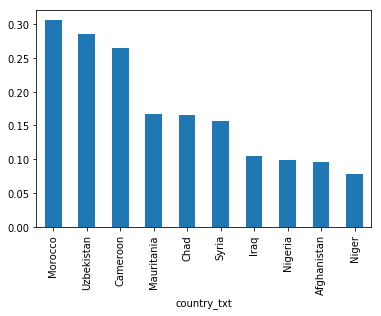

In [85]:
(suicide_attacks.groupby(['country_txt']).size().sort_values(ascending=False)/(total_events_per_country_atleast_10)).sort_values(ascending=False)[:10
                                                                                                                                                 ].plot(kind='bar')

### India

In [86]:
india_gtd = gtd[gtd.country_txt == 'India']

In [87]:
india_gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,is_kill
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palestinians,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,1.0,5000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,187.0,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN,0
2764,197501190004,1975,1,2,NaN,0,NaN,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,3.0,Police,25.0,Police Security Forces/Officers,Guards,2 Guards,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ananda Marga,NaN,NaN,NaN,NaN,NaN,Unknown,1.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN,1
3857,197605260001,1976,5,26,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,0
5327,197709280004,1977,9,28,NaN,0,NaN,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN

In [92]:
india_gtd.groupby(['provstate']).size()

provstate
Andhra Pradesh        251
Andhra pradesh         41
Arunachal Pradesh      24
Assam                1151
Bihar                 688
Chandigarh             47
Chhattisgarh          979
Delhi                 208
Goa                     5
Gujarat                85
Haryana                50
Himachal Pradesh       24
Jammu and Kashmir    2454
Jharkhand             887
Karnataka              71
Kerala                 98
Madhya Pradesh         75
Maharashtra           302
Manipur              1100
Meghalaya             294
Mizoram                27
Nagaland              115
Odisha                428
Orissa                221
Puducherry              2
Punjab                949
Rajasthan              43
Sikkim                  4
Tamil Nadu            164
Telangana              24
Tripura               117
Unknown               157
Uttar Pradesh         201
Uttaranchal            24
West Bengal           650
dtype: int64

C:\Users\sijop\Anaconda2\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x360 with 0 Axes>

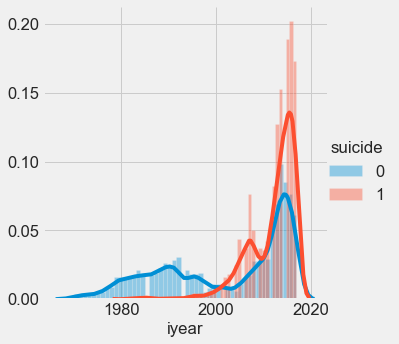

In [510]:
plt.figure(figsize=(15,5))
sns.FacetGrid(gtd, hue="suicide", size=5) \
   .map(sns.distplot, "iyear") \
   .add_legend();
plt.show();

# Extended

In [95]:
extended = gtd[gtd.extended == 1]

In [96]:
extended.groupby(['gname']).size()

gname
14 March Coalition                                            1
23 May Democratic Alliance (Algeria)                          3
23rd of September Communist League                            6
2nd of June Movement                                          1
A'chik Matgrik Elite Force (AMEF)                             2
Abbala extremists                                             3
Abdul Ghani Kikli Militia                                     1
Abida Tribe                                                   1
Abu Nidal Organization (ANO)                                  1
Abu Salim Martyr's Brigade                                    1
Abu Sayyaf Group (ASG)                                      170
Achik National Cooperative Army (ANCA)                        1
Achik National Liberation Army (ANLA)                         3
Achik National Volunteer Council-B (ANVC-B)                   3
Achik Songna An'pachakgipa Kotok (ASAK)                      15
Action Directe                    

### Time Series 

In [121]:
# For time series analysis, we also need another module
from datetime import datetime

In [130]:
total_events_per_year['year'] = pd.to_datetime(total_events_per_year.index)

In [134]:
total_events_per_year

2014                                                16903
2015                                                14965
2016                                                13587
2013                                                12036
2017                                                10900
2012                                                 8522
2011                                                 5076
1992                                                 5071
2010                                                 4826
2008                                                 4805
2009                                                 4721
1991                                                 4683
1989                                                 4324
1990                                                 3887
1988                                                 3721
1984                                                 3495
1994                                                 3456
2007          

In [133]:
.plot(label='Daily close')
#gtd['Close'].rolling(window=30, min_periods=10).mean().plot(label='30-day average')
ylabel('Stock price')
legend(loc='best')
show()

TypeError: Empty 'DataFrame': no numeric data to plot

# Correlation

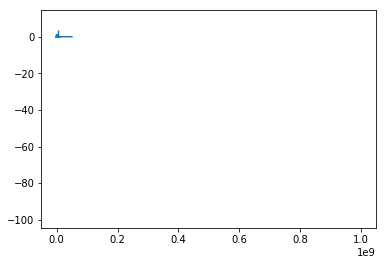

In [147]:
plot(gtd['ransomamt'], gtd['nhostkidus'])
plt.show()


## SUICIDE

In [372]:
proportion_suicide=(suicide_attacks.groupby(['country_txt']).size().sort_values(ascending=False)/(total_events_per_country_atleast_10)).sort_values(ascending = False)[:10]
prop_non_suicide = 1-proportion_suicide
countries_suicide = proportion_suicide.index

In [386]:
list(prop_non_suicide)

[0.6944444444444444,
 0.7142857142857143,
 0.7349397590361446,
 0.8333333333333334,
 0.8351648351648352,
 0.8437074057246706,
 0.8943822049033934,
 0.9004351164576401,
 0.9035425339721939,
 0.922077922077922]

In [405]:
countries = countries_suicide
#bronzes = np.array([38, 17, 26, 19, 15])
silvers = list(proportion_suicide)
golds = list(prop_non_suicide)
ind = [x for x, _ in enumerate(countries_suicide)]
ind


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

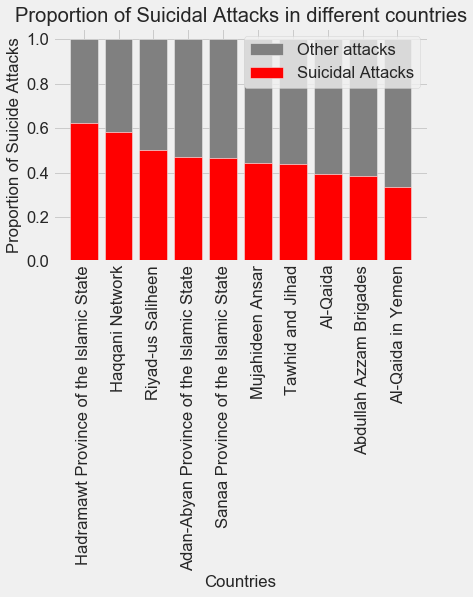

In [557]:
plt.bar(ind, golds, width=0.8, label='Other attacks', color='grey',bottom=silvers)
plt.bar(ind, silvers, width=0.8, label='Suicidal Attacks', color='red')
#plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')
#ax.xaxis.set_tick_params(width=5)
#ax.yaxis.set_tick_params(width=5)
plt.xticks(ind, countries)
plt.xticks(rotation=90)
plt.ylabel("Proportion of Suicide Attacks")
plt.xlabel("Countries")
#plt.invert_yaxis() 
plt.legend(loc="upper right")
plt.title("Proportion of Suicidal Attacks in different countries")

plt.show()

In [413]:
(suicide_attacks.groupby(['gname']).size() / total_attacks_atleast_10).sort_values(ascending =False)[:10]

gname
Hadramawt Province of the Islamic State                                      0.625000
Haqqani Network                                                              0.581395
Riyadus-Salikhin Reconnaissance and Sabotage Battalion of Chechen Martyrs    0.500000
Adan-Abyan Province of the Islamic State                                     0.468085
Sanaa Province of the Islamic State                                          0.466667
Mujahideen Ansar                                                             0.444444
Tawhid and Jihad                                                             0.440000
Al-Qaida                                                                     0.391892
Abdullah Azzam Brigades                                                      0.384615
Al-Qaida in Yemen                                                            0.333333
dtype: float64

In [431]:
type()

pandas.core.indexes.base.Index

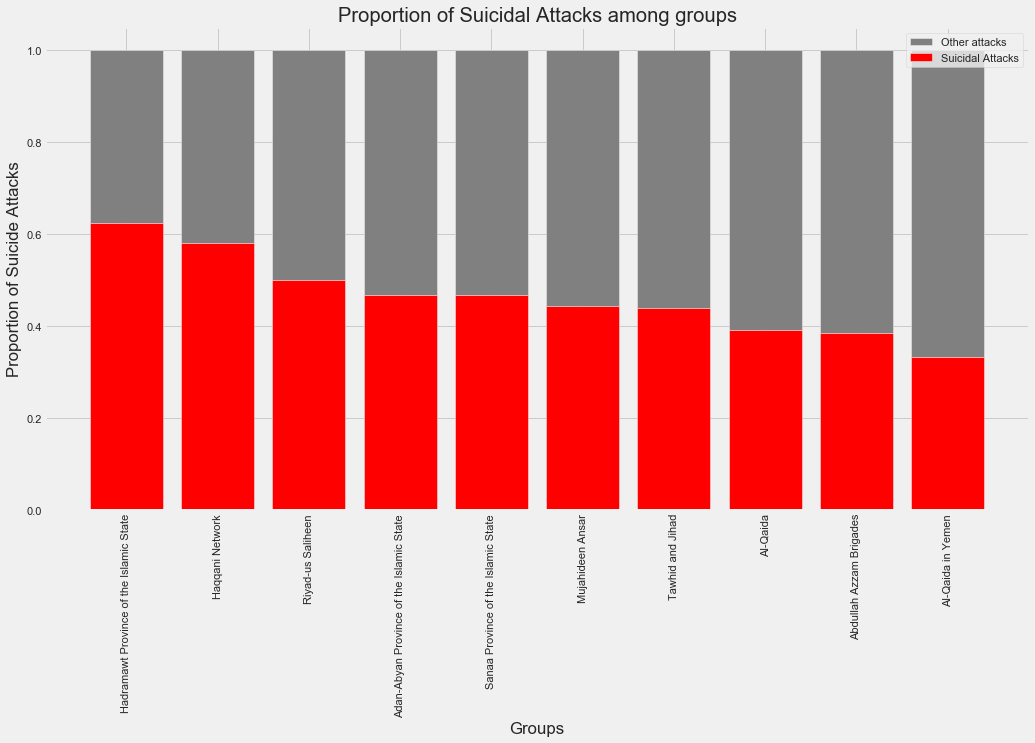

In [432]:
gname_prop_suicide = (suicide_attacks.groupby(['gname']).size() / total_attacks_atleast_10).sort_values(ascending =False)[:10]
gname_prop_non_suicide = 1 - gname_prop_suicide
countries_gname_suicide = gname_prop_suicide.index
countries = list(countries_gname_suicide)
countries[2] = 'Riyad-us Saliheen'
#bronzes = np.array([38, 17, 26, 19, 15])
silvers = list(gname_prop_suicide)
golds = list(gname_prop_non_suicide)
ind = [x for x, _ in enumerate(countries_gname_suicide)]
ind

plt.bar(ind, golds, width=0.8, label='Other attacks', color='grey',bottom=silvers)
plt.bar(ind, silvers, width=0.8, label='Suicidal Attacks', color='red')
#plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')

plt.xticks(ind, countries)
plt.ylabel("Proportion of Suicide Attacks")
plt.xlabel("Groups")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.title("Proportion of Suicidal Attacks among groups")

plt.show()

In [417]:
gname_prop_non_suicide

gname
Hadramawt Province of the Islamic State                                      0.375000
Haqqani Network                                                              0.418605
Riyadus-Salikhin Reconnaissance and Sabotage Battalion of Chechen Martyrs    0.500000
Adan-Abyan Province of the Islamic State                                     0.531915
Sanaa Province of the Islamic State                                          0.533333
Mujahideen Ansar                                                             0.555556
Tawhid and Jihad                                                             0.560000
Al-Qaida                                                                     0.608108
Abdullah Azzam Brigades                                                      0.615385
Al-Qaida in Yemen                                                            0.666667
dtype: float64

### Handgun

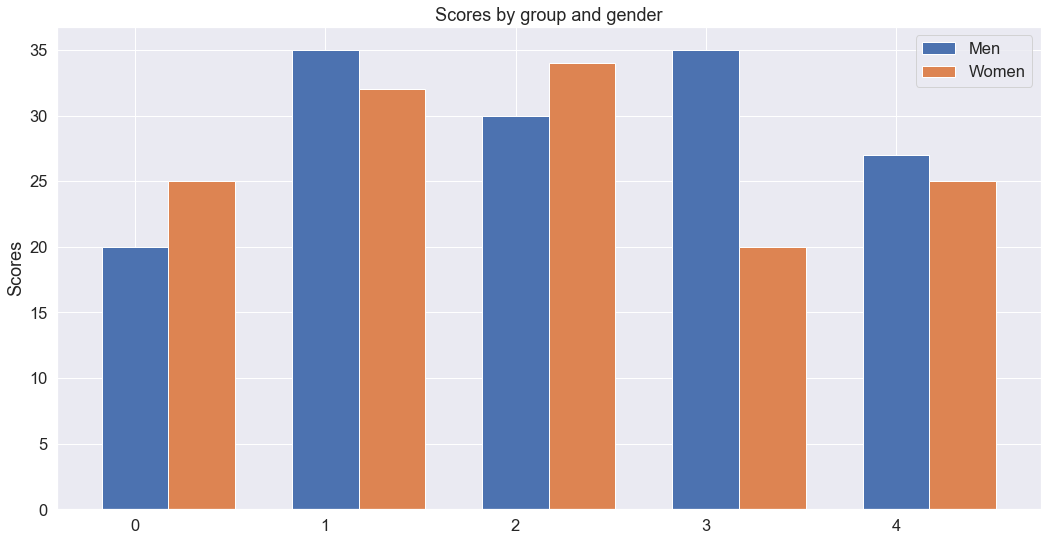

In [451]:
import numpy as np

N = 5
men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind+width , women_means, width, label='Women')

plt.ylabel('Scores')
plt.title('Scores by group and gender')

#plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(loc='best')
plt.show()

In [446]:
ind

array([0, 1, 2, 3, 4])

In [456]:

hand_gun_prop = ((handgun.targsubtype1_txt.value_counts())/total_target_count).sort_values(ascending = False)[:10]

In [459]:
hand_gun_top_targets = hand_gun_prop.index

In [467]:
hand_gun_total=(handgun.targsubtype1_txt.value_counts())#/total_target_count)
hand_gun_total = hand_gun_total[hand_gun_total.index.isin(hand_gun_top_targets)]

Politician or Political Party Movement/Meeting/Rally    726
Newspaper Journalist/Staff/Facility                     170
Radio Journalist/Staff/Facility                         143
Labor Union Related                                     115
Diplomatic Personnel (outside of embassy, consulate)    109
Teacher/Professor/Instructor                             99
Aircraft (not at an airport)                             59
Other Personnel                                          57
Legal Services                                           13
Non-combatant Personnel                                   5
Name: targsubtype1_txt, dtype: int64

Aircraft (not at an airport)                             8.347722
Diplomatic Personnel (outside of embassy, consulate)    12.493165
Labor Union Related                                     16.226994
Legal Services                                           1.920455
Newspaper Journalist/Staff/Facility                     19.500675
Non-combatant Personnel                                  0.609756
Other Personnel                                          7.002155
Politician or Political Party Movement/Meeting/Rally    83.583254
Radio Journalist/Staff/Facility                         28.964589
Teacher/Professor/Instructor                            11.996328
dtype: float64

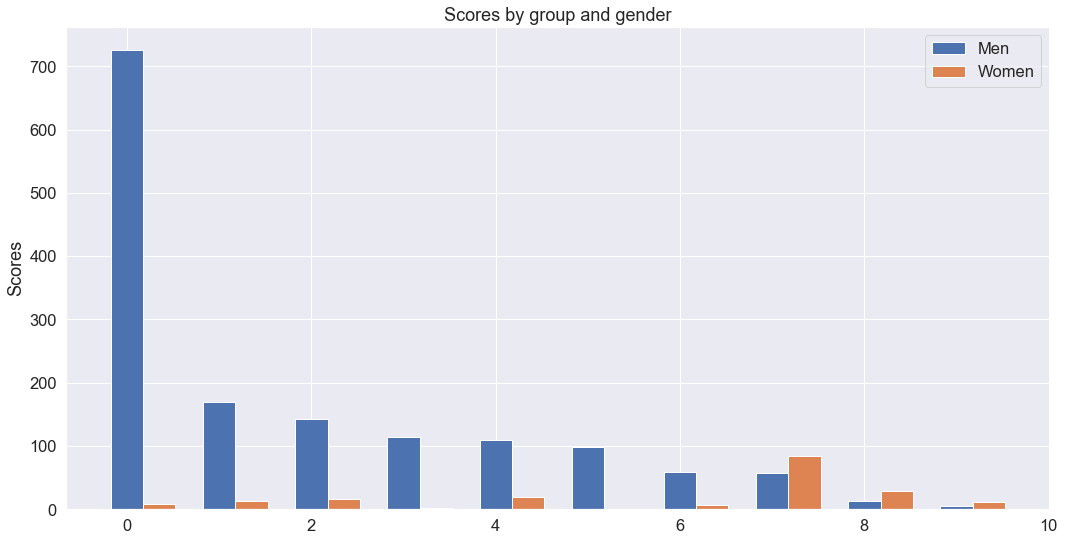

In [472]:
import numpy as np

men_means = list(hand_gun_total)
women_means = list(hand_gun_prop*hand_gun_total)

ind = np.arange(len(hand_gun_top_targets)) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind+width , women_means, width, label='Women')

plt.ylabel('Scores')
plt.title('Scores by group and gender')

#plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(loc='best')
plt.show()

## handgun

In [477]:
gtd.groupby(['gname'])['is_handgun'].size() > 2
atleast_10_handgun = (gtd.groupby(['gname'])['is_handgun'].size() > 2).index
#.sort_values(ascending = False)

In [487]:
hand_aggregated=gtd[gtd.gname.isin(atleast_10_handgun)].groupby(['gname'])['is_handgun'].agg( ['count','sum','mean']).sort_values('mean', ascending =False)

In [488]:
hand_aggregated = hand_aggregated[hand_aggregated['count'] > 10]

In [496]:
hand_aggregated= hand_aggregated.sort_values('mean', ascending = False)[:10]

In [502]:
print(tabulate(hand_aggregated, headers='keys', tablefmt='psql'))


+-----------------------------------------------+---------+-------+----------+
| gname                                         |   count |   sum |     mean |
|-----------------------------------------------+---------+-------+----------|
| Zebra killers                                 |      20 |    17 | 0.85     |
| National Socialist Underground                |      14 |    10 | 0.714286 |
| 2nd of June Movement                          |      14 |     8 | 0.571429 |
| Irish People's Liberation Organization (IPLO) |      21 |    11 | 0.52381  |
| Jammu and Kashmir Liberation Front            |      55 |    28 | 0.509091 |
| Black Liberation Army                         |      36 |    18 | 0.5      |
| Aryan Republican Army                         |      16 |     8 | 0.5      |
| Death Squad                                   |     326 |   158 | 0.484663 |
| Black Panther Group (Palestinian)             |      17 |     8 | 0.470588 |
| Italian Social Movement (MSI)                 |   

In [498]:
hand_aggregated

,count,sum,mean
gname,,,
Zebra killers,20,17,0.850000
National Socialist Underground,14,10,0.714286
2nd of June Movement,14,8,0.571429
Irish People's Liberation Organization (IPLO),21,11,0.523810
Jammu and Kashmir Liberation Front,55,28,0.509091
Black Liberation Army,36,18,0.500000
Aryan Republican Army,16,8,0.500000
Death Squad,326,158,0.484663
Black Panther Group (Palestinian),17,8,0.470588


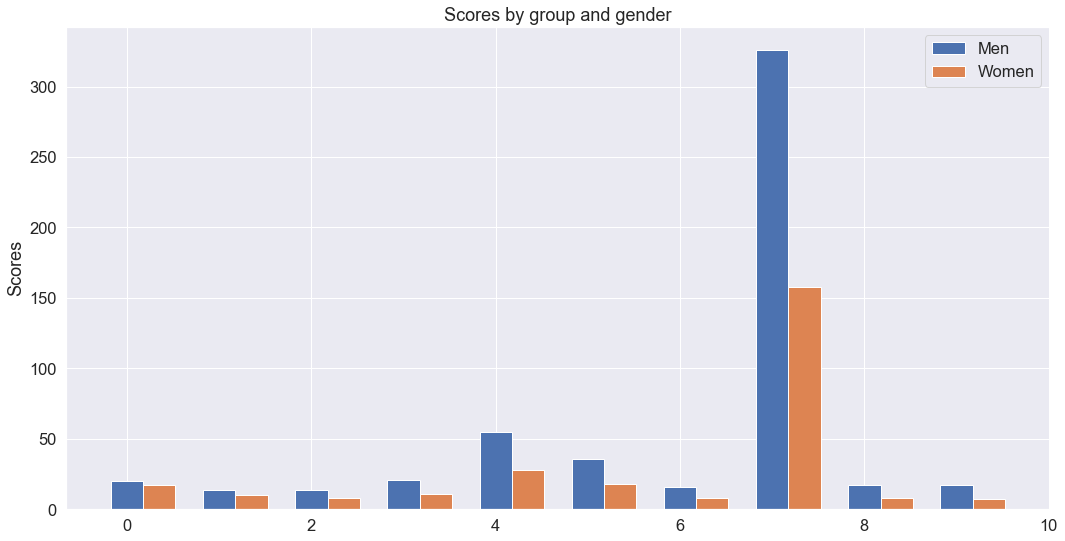

In [497]:
import numpy as np

men_means = list(hand_aggregated['count'])
women_means = list(hand_aggregated['sum'])

ind = np.arange(len(hand_aggregated)) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind+width , women_means, width, label='Women')

plt.ylabel('Scores')
plt.title('Scores by group and gender')

#plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(loc='best')
plt.show()

[0.  0.2 0.4 0.6 0.8 1. ]


Text(0,0.5,'Percentage')

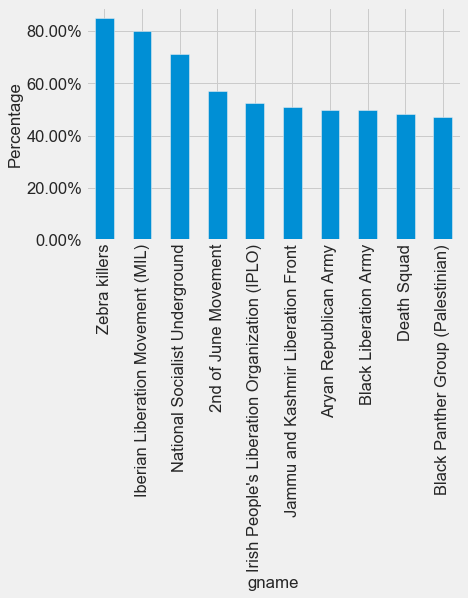

In [509]:
ax=(handgun.groupby(['gname']).size() / total_attacks_atleast_10).sort_values(ascending =False)[:10].plot(kind='bar', stacked=True)
vals = ax.get_yticks()
print vals
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.style.use('fivethirtyeight')
ax.set_ylabel("Percentage")
ax.s
#ax.set_xticklabels( rotation=45 ) 

ImportError: No module named tabulate

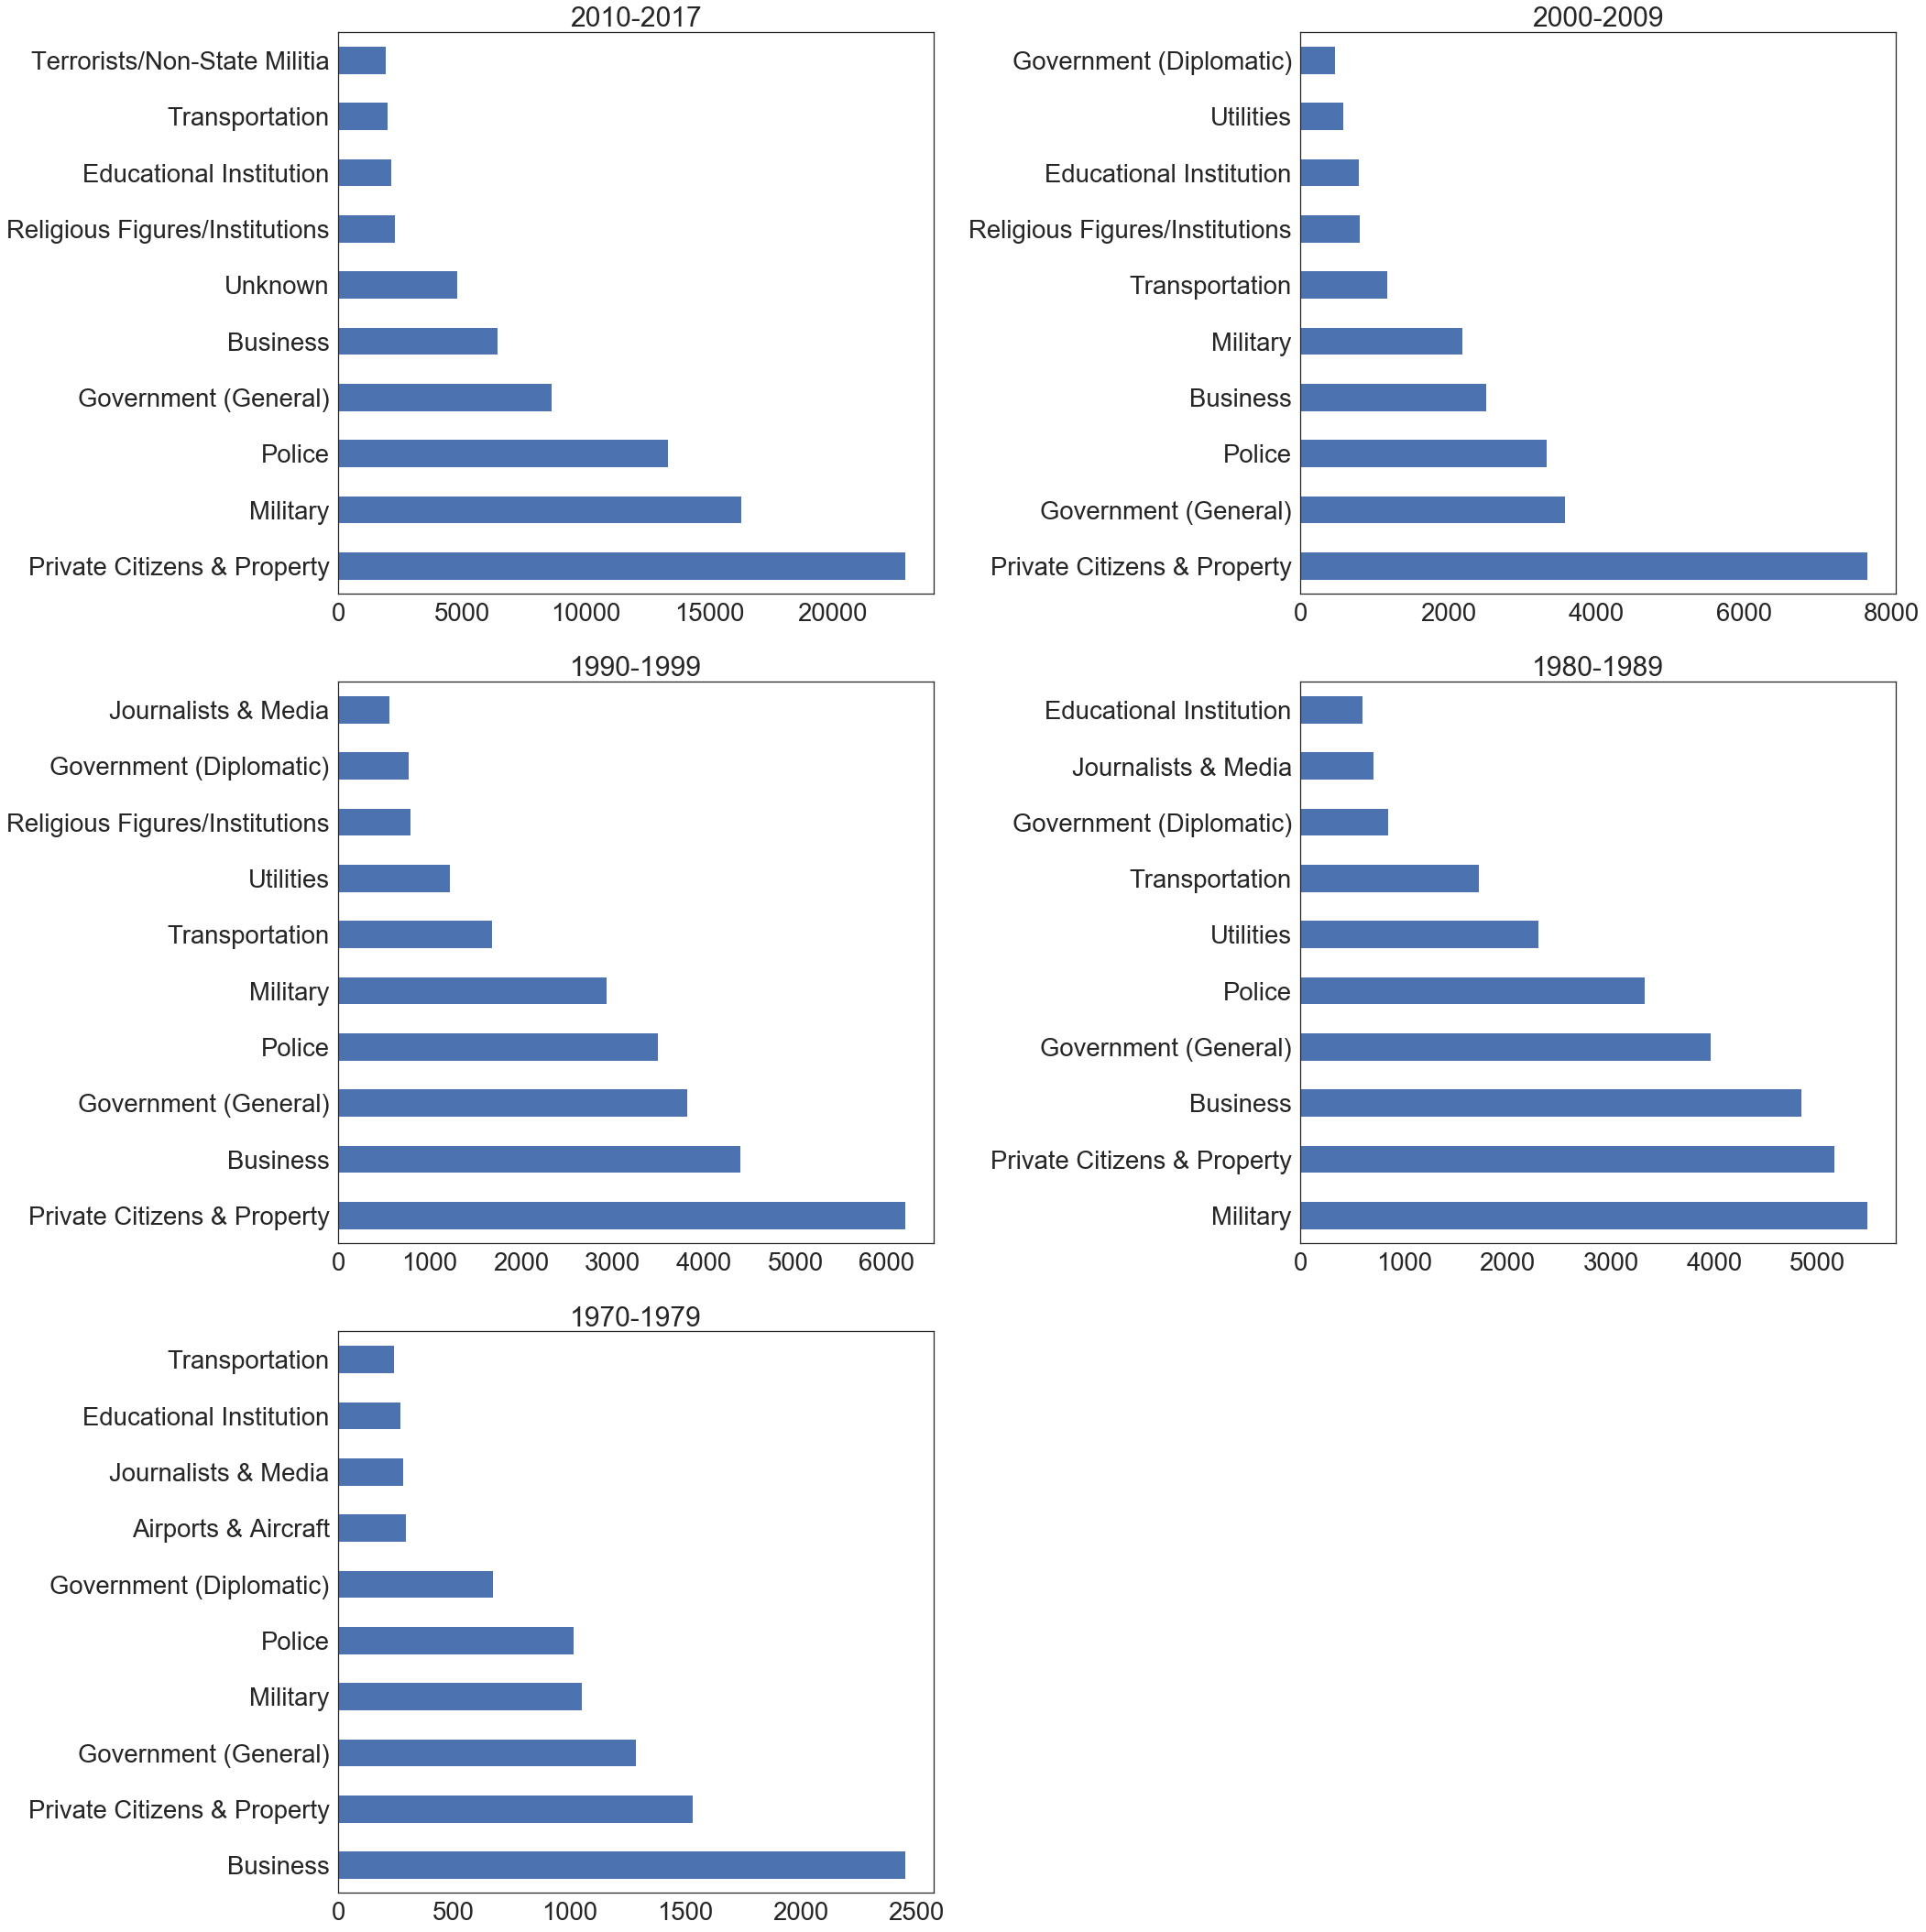

In [561]:
data_ter = gtd
def plot_by_years(kind='region_txt',big=(30,20)):
    sns.set(style="white",font_scale=2.5)
    fig = plt.figure(figsize=big)
    ax1 = fig.add_subplot(3,2,1)
    ax1.set_title('2010-2017')
    ax1.set_ylabel('');
    data_ter[data_ter['iyear']>=2010]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax1.set_ylabel('');
    ax2 = fig.add_subplot(3,2,2)
    ax2.set_title('2000-2009')
    data_ter[(data_ter['iyear']>=2000) & (data_ter['iyear']<2010)]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax2.set_ylabel('');
    ax3 = fig.add_subplot(3,2,3)
    ax3.set_title('1990-1999')
    data_ter[(data_ter['iyear']>=1990) & (data_ter['iyear']<2000)]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax3.set_ylabel('');
    ax4 = fig.add_subplot(3,2,4)
    ax4.set_title('1980-1989')
    data_ter[(data_ter['iyear']>=1980) & (data_ter['iyear']<1990)]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax4.set_ylabel('');
    ax4 = fig.add_subplot(3,2,5)
    ax4.set_title('1970-1979')
    data_ter[(data_ter['iyear']>=1970) & (data_ter['iyear']<1980)]['eventid'].groupby(data_ter[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    plt.ylabel('');
plot_by_years(kind='targtype1_txt',big=(30,30));

In [584]:
gtd.weapsubtype1_txt

Index([u'eventid', u'iyear', u'imonth', u'iday', u'approxdate', u'extended',
       u'resolution', u'country', u'country_txt', u'region',
       ...
       u'scite1', u'scite2', u'scite3', u'dbsource', u'INT_LOG', u'INT_IDEO',
       u'INT_MISC', u'INT_ANY', u'related', u'is_handgun'],
      dtype='object', length=136)

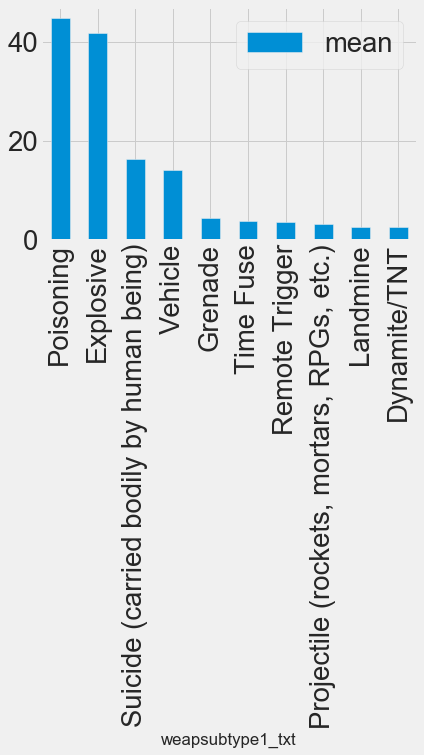